<a href="https://colab.research.google.com/github/swathysathesh/CAT-DOG-CLASSIFICATION/blob/main/cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cat & Dog classification**

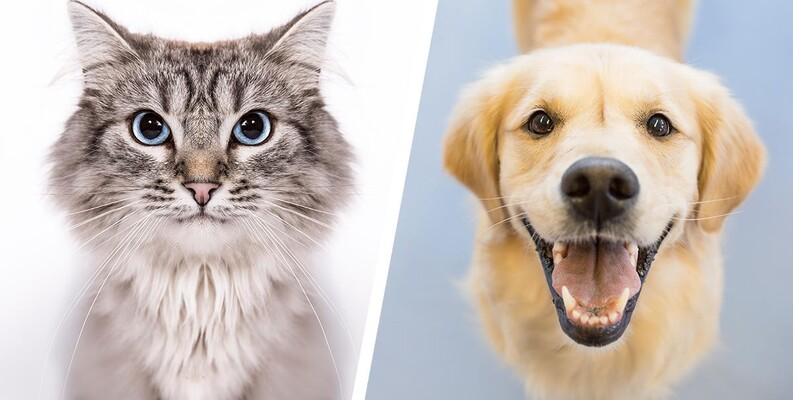

This dataset encompasses a collection of images specifically curated for the purpose of classifying between cats and dogs. It likely includes a variety of pictures featuring both cats and dogs, designed to aid in training machine learning models or algorithms for image classification tasks. These images may vary in terms of breeds, poses, backgrounds, and other characteristics relevant to distinguishing between cats and dogs.

In [ ]:
#drive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Libraries

In [ ]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from skimage.transform import resize

In [ ]:
os.listdir('/content/drive/MyDrive/Data/Data')

['Dog', 'Cat']

In [ ]:
len(os.listdir('/content/drive/MyDrive/Data/Data/Cat'))

85

In [ ]:
len(os.listdir('/content/drive/MyDrive/Data/Data/Dog'))

68

In [ ]:
catpath=os.path.join('/content/drive/MyDrive/Data/Data','Cat')
for img in os.listdir(catpath):
  print(img)

cat.111.jpg
cat.109.jpg
cat.107.jpg
cat.106.jpg
cat.102.jpg
cat.108.jpg
cat.101.jpg
cat.105.jpg
cat.110.jpg
cat.103.jpg
cat.100.jpg
cat.104.jpg
cat.112.jpg
cat.118.jpg
cat.116.jpg
cat.119.jpg
cat.113.jpg
cat.114.jpg
cat.117.jpg
cat.115.jpg
cat.42.jpg
cat.55.jpg
cat.48.jpg
cat.56.jpg
cat.50.jpg
cat.54.jpg
cat.61.jpg
cat.44.jpg
cat.49.jpg
cat.36.jpg
cat.37.jpg
cat.62.jpg
cat.46.jpg
cat.47.jpg
cat.53.jpg
cat.39.jpg
cat.52.jpg
cat.60.jpg
cat.35.jpg
cat.38.jpg
cat.40.jpg
cat.45.jpg
cat.43.jpg
cat.41.jpg
cat.51.jpg
cat.63.jpg
cat.58.jpg
cat.59.jpg
cat.57.jpg
cat.78.jpg
cat.91.jpg
cat.68.jpg
cat.82.jpg
cat.93.jpg
cat.85.jpg
cat.89.jpg
cat.92.jpg
cat.69.jpg
cat.84.jpg
cat.80.jpg
cat.98.jpg
cat.65.jpg
cat.81.jpg
cat.96.jpg
cat.90.jpg
cat.79.jpg
cat.99.jpg
cat.83.jpg
cat.70.jpg
cat.88.jpg
cat.66.jpg
cat.71.jpg
cat.97.jpg
cat.86.jpg
cat.73.jpg
cat.64.jpg
cat.87.jpg
cat.95.jpg
cat.77.jpg
cat.67.jpg
cat.72.jpg
cat.94.jpg
cat.74.jpg
cat.76.jpg
cat.75.jpg


In [ ]:
dogpath=os.path.join('/content/drive/MyDrive/Data/Data','Dog')
for img in os.listdir(dogpath):
  print(img)

dog.14.jpg
dog.13.jpg
dog.12.jpg
dog.15.jpg
dog.1.jpg
dog.11.jpg
dog.10.jpg
dog.23.jpg
dog.2.jpg
dog.21.jpg
dog.22.jpg
dog.16.jpg
dog.19.jpg
dog.24.jpg
dog.18.jpg
dog.20.jpg
dog.17.jpg
dog.31.jpg
dog.33.jpg
dog.32.jpg
dog.27.jpg
dog.25.jpg
dog.26.jpg
dog.3.jpg
dog.30.jpg
dog.28.jpg
dog.29.jpg
dog.44.jpg
dog.57.jpg
dog.5.jpg
dog.41.jpg
dog.59.jpg
dog.45.jpg
dog.35.jpg
dog.38.jpg
dog.42.jpg
dog.34.jpg
dog.50.jpg
dog.55.jpg
dog.52.jpg
dog.47.jpg
dog.54.jpg
dog.6.jpg
dog.37.jpg
dog.58.jpg
dog.4.jpg
dog.39.jpg
dog.43.jpg
dog.48.jpg
dog.53.jpg
dog.51.jpg
dog.49.jpg
dog.40.jpg
dog.56.jpg
dog.46.jpg
dog.60.jpg
dog.36.jpg
dog.7.jpg
dog.67.jpg
dog.65.jpg
dog.8.jpg
dog.66.jpg
dog.64.jpg
dog.61.jpg
dog.68.jpg
dog.62.jpg
dog.9.jpg
dog.63.jpg


In [ ]:
flat_data_arr=[]
target_arr=[]
categories=['Cat','Dog']
datadir='/content/drive/MyDrive/Data/Data'

In [ ]:
for i in categories:
  print("Loading categories.........")
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_arr=imread(os.path.join(path,img))
    img_resize=resize(img_arr,(150,150,3))
    flat_data_arr.append(img_resize.flatten())
    target_arr.append(categories.index(i))
  print("Loaded completely",i)


Loading categories.........
Loaded completely Cat
Loading categories.........
Loaded completely Dog


In [ ]:
flat_data=np.array(flat_data_arr)
target_data=np.array(target_arr)
df=pd.DataFrame(flat_data)
df

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.362646,0.316581,0.213245,0.338924,0.300045,0.192860,0.331955,0.296877,0.183513,0.282675,...,0.749911,0.991918,0.968385,0.740957,0.990272,0.967949,0.740521,0.990922,0.969835,0.742407
1,0.818554,0.834240,0.830318,0.828373,0.844060,0.840138,0.837628,0.853315,0.849393,0.843363,...,0.873918,0.805381,0.828913,0.869331,0.791198,0.809448,0.851731,0.773442,0.800579,0.839899
2,0.186657,0.186640,0.221778,0.191698,0.191680,0.226823,0.186147,0.186129,0.221276,0.182267,...,0.221204,0.322640,0.232582,0.220778,0.307843,0.229316,0.221181,0.307185,0.221946,0.231622
3,0.252673,0.225222,0.200269,0.253675,0.226224,0.201271,0.269715,0.242264,0.217310,0.277829,...,0.718447,0.671737,0.695783,0.694567,0.667462,0.687126,0.681188,0.671256,0.689978,0.676960
4,0.567769,0.512867,0.461886,0.573767,0.518865,0.467885,0.545760,0.490858,0.439877,0.557858,...,0.521950,0.728231,0.660557,0.600644,0.698120,0.629841,0.567903,0.732229,0.653866,0.600209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.226042,0.062045,0.033788,0.220628,0.056625,0.028370,0.217439,0.053431,0.025178,0.224847,...,0.452087,0.542107,0.475440,0.447989,0.520023,0.452940,0.426114,0.516535,0.443053,0.425825
149,0.339050,0.367841,0.423704,0.496663,0.514714,0.548421,0.471958,0.488760,0.506873,0.425741,...,0.305655,0.616179,0.447552,0.310297,0.623240,0.454612,0.317357,0.612691,0.444063,0.306808
150,0.048783,0.046052,0.040591,0.040040,0.037309,0.031848,0.039114,0.036383,0.030922,0.042620,...,0.049052,0.243144,0.293808,0.060043,0.284722,0.342444,0.076628,0.302048,0.327798,0.056587
151,0.815650,0.849131,0.845227,0.933889,0.955618,0.969236,0.891768,0.905157,0.937564,0.477821,...,0.094129,0.313858,0.429106,0.209400,0.405920,0.508851,0.307331,0.362543,0.453008,0.271112


In [ ]:
df.shape

(153, 67500)

In [ ]:
df['Target']=target_data
df.shape

(153, 67501)

In [ ]:
x=df.iloc[:,:-1].values
x

array([[0.36264571, 0.3165807 , 0.2132452 , ..., 0.99092236, 0.96983543,
        0.74240749],
       [0.81855354, 0.83423981, 0.83031824, ..., 0.77344163, 0.80057886,
        0.83989913],
       [0.18665747, 0.18663997, 0.22177792, ..., 0.30718484, 0.22194585,
        0.23162181],
       ...,
       [0.0487829 , 0.04605222, 0.04059084, ..., 0.30204752, 0.32779848,
        0.05658733],
       [0.81564955, 0.84913071, 0.84522713, ..., 0.3625432 , 0.45300801,
        0.27111228],
       [0.38306726, 0.38614976, 0.30359064, ..., 0.36259867, 0.44070103,
        0.18474366]])

In [ ]:
y=df.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=42)
x_train

array([[0.22604177, 0.06204532, 0.0337883 , ..., 0.51653452, 0.44305258,
        0.42582451],
       [0.56447059, 0.58015686, 0.57623529, ..., 0.78431373, 0.76862745,
        0.73333333],
       [0.28680013, 0.24594407, 0.25066917, ..., 0.51916953, 0.41782577,
        0.3399393 ],
       ...,
       [0.543469  , 0.30993263, 0.65713784, ..., 0.20288416, 0.09688132,
        0.15608128],
       [0.84878496, 0.82525555, 0.77819672, ..., 0.84478071, 0.81986949,
        0.70555633],
       [0.076956  , 0.13147244, 0.08068481, ..., 0.22326741, 0.25454177,
        0.30581602]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)
x_train

array([[-0.81296576, -1.40357597, -1.41022391, ...,  0.12766452,
        -0.02985779,  0.07135949],
       [ 0.57269669,  0.68588429,  0.7697263 , ...,  1.24754079,
         1.26991643,  1.23380822],
       [-0.56419685, -0.66194199, -0.53863739, ...,  0.13868437,
        -0.13056936, -0.25330486],
       ...,
       [ 0.48670781, -0.40388643,  1.09485212, ..., -1.18404897,
        -1.41185784, -0.94832726],
       [ 1.73679303,  1.67432775,  1.58135558, ...,  1.50041905,
         1.47448716,  1.12880523],
       [-1.42338232, -1.1235876 , -1.22175932, ..., -1.09880442,
        -0.78243888, -0.38229813]])

In [ ]:
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.5


#Prediction: this image is cat or dog

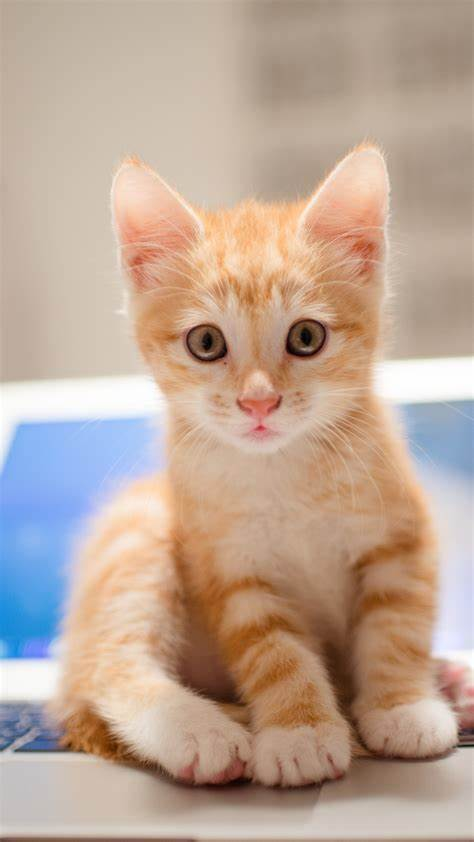

In [ ]:
path1='/content/drive/MyDrive/cat2.jpeg'
img=imread(path1)
img=resize(img,(150,150,3)).flatten().reshape(1,-1)
model.predict(img)

array([0])

array[0] is cat.